In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/HariharanR344/Sentiment-Analysis/refs/heads/main/chatgpt_style_reviews_dataset.xlsx%20-%20Sheet1.csv")
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...
495,7/5/2024,Review title 496,"Waste of time, does not meet expectations.",2,user496,81,7,Flipkart,ja,Qatar,1.2.3,No
496,########,Review title 497,"Great experience, smooth performance and usefu...",5,user497,48,7,Google Play,fr,Nepal,2.1.4,No
497,########,Review title 498,"Terrible experience, needs major improvements.",2,user498,16,5,Google Play,de,Poland,2.1.4,Yes
498,########,Review title 499,"Highly satisfied, the app works exactly as exp...",4,user499,68,8,Google Play,zh,Nepal,1.2.3,Yes


In [ ]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [ ]:
df.dtypes

,0
date,object
title,object
review,object
rating,int64
username,object
helpful_votes,int64
review_length,int64
platform,object
language,object
location,object


In [ ]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No,satisfied many bug issue
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No,amazing quality userfriendly interface
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No,terrible experience need major improvement
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes,poor performance userfriendly
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No,satisfied many bug issue


In [5]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)
df["sentiment"].value_counts()


,count
sentiment,
Positive,200
Negative,195
Neutral,105


In [ ]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,sentiment
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No,satisfied many bug issue,Negative
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No,amazing quality userfriendly interface,Positive
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No,terrible experience need major improvement,Negative
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes,poor performance userfriendly,Negative
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No,satisfied many bug issue,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7/5/2024,Review title 496,"Waste of time, does not meet expectations.",2,user496,81,7,Flipkart,ja,Qatar,1.2.3,No,waste time meet expectation,Negative
496,########,Review title 497,"Great experience, smooth performance and usefu...",5,user497,48,7,Google Play,fr,Nepal,2.1.4,No,great experience smooth performance useful fea...,Positive
497,########,Review title 498,"Terrible experience, needs major improvements.",2,user498,16,5,Google Play,de,Poland,2.1.4,Yes,terrible experience need major improvement,Negative
498,########,Review title 499,"Highly satisfied, the app works exactly as exp...",4,user499,68,8,Google Play,zh,Nepal,1.2.3,Yes,highly satisfied app work exactly expected,Positive


In [6]:
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["clean_review"],
    df["sentiment"],
    test_size=0.3,
    random_state=42,
    stratify=df["sentiment"]
)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2) # bigrams for stronger pattern memorization
)

In [8]:
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross Validation Accuracy:", cv_scores.mean())


Cross Validation Accuracy: 1.0


In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        59
     Neutral       1.00      1.00      1.00        31
    Positive       1.00      1.00      1.00        60

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



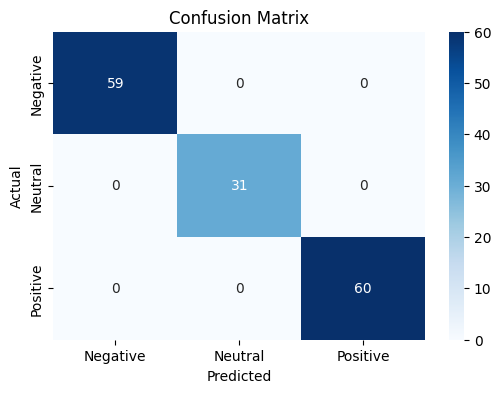

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
df['review'].value_counts()

,count
review,
"Highly satisfied, the app works exactly as expected.",50
"Waste of time, does not meet expectations.",43
Very reliable and worth using regularly.,43
Poor performance and not user-friendly.,41
"Terrible experience, needs major improvements.",41
"Great experience, smooth performance and useful features.",39
"Very disappointing experience, the app crashes often.",38
"Excellent app, very easy to use and extremely helpful.",35
Amazing quality and user-friendly interface.,33


In [15]:
import pickle

with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("stopwords.pkl", "wb") as f:
    pickle.dump(stop_words, f)

with open("lemmatizer.pkl", "wb") as f:
    pickle.dump(lemmatizer, f)


In [17]:
with open("dashboard_data.pkl", "wb") as f:
    pickle.dump(df, f)


In [16]:
from google.colab import files

files.download("tfidf.pkl")
files.download("sentiment_model.pkl")
files.download("stopwords.pkl")
files.download("lemmatizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
files.download("dashboard_data.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1. What is the distribution of review ratings?

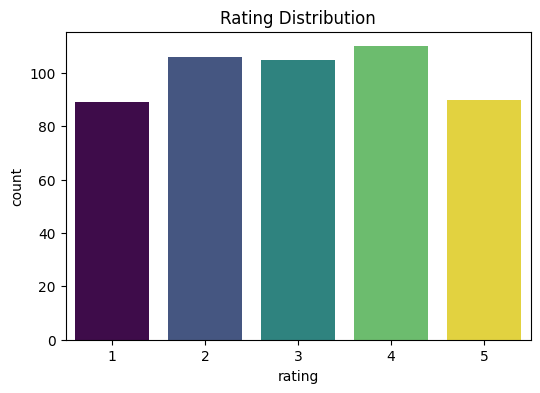

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='rating', hue='rating', data=df, palette='viridis', legend=False)
plt.title("Rating Distribution")
plt.show()

# 2. How many reviews were marked as helpful (above a certain threshold)?

In [ ]:
df['helpful_category'] = df['helpful_votes'].apply(
    lambda x: 'Helpful' if x > 10 else 'Not Helpful'
)

df['helpful_category'].value_counts()


,count
helpful_category,
Helpful,473
Not Helpful,27


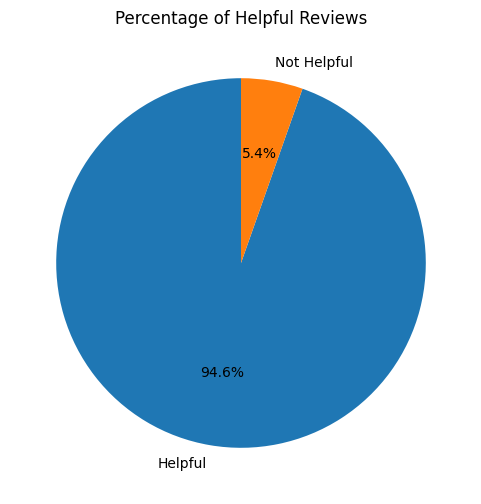

In [ ]:
helpful_counts = df['helpful_category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(helpful_counts, labels=helpful_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Helpful Reviews")
plt.show()


# 3. What are the most common keywords in positive vs. negative reviews?

In [ ]:
positive_reviews = df[df['rating'] >= 4]['clean_review']
negative_reviews = df[df['rating'] <= 2]['clean_review']

positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)


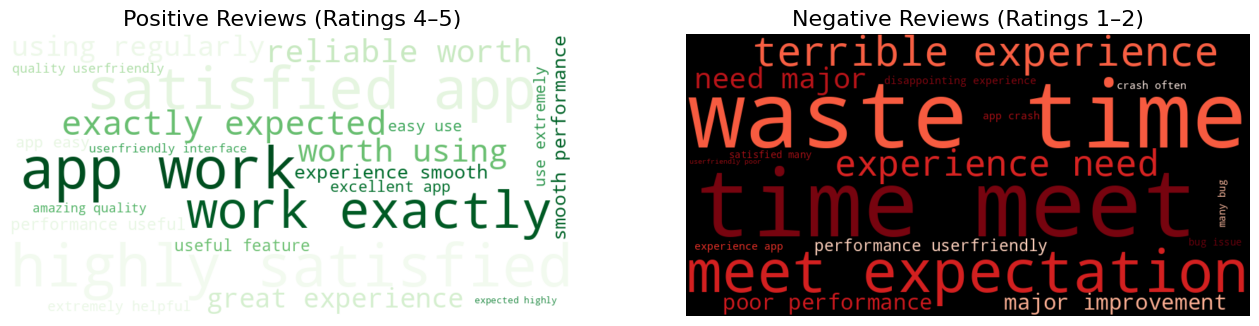

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive WordCloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens"
).generate(positive_text)

# Negative WordCloud
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Reds"
).generate(negative_text)

# Plot both side by side
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews (Ratings 4–5)", fontsize=16)

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews (Ratings 1–2)", fontsize=16)

plt.show()


# 5. How do ratings vary by user location?


In [ ]:
df['location'].value_counts()

,count
location,
Kenya,60
India,57
Poland,56
USA,55
Germany,55
Qatar,51
Nepal,45
Italy,43
France,40


In [ ]:
location_ratings = df.groupby('location')['rating'].mean().sort_values(ascending=False)
location_ratings


,rating
location,
UK,3.342105
Italy,3.186047
Nepal,3.177778
India,3.175439
France,3.125000
Germany,3.109091
Poland,2.964286
Kenya,2.933333
USA,2.727273


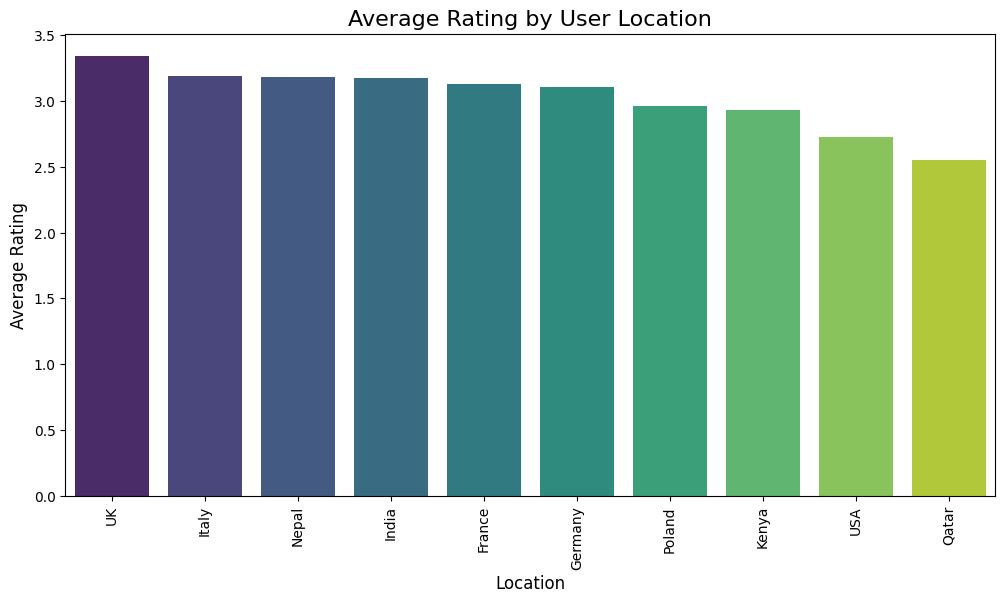

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=location_ratings.index,
    y=location_ratings.values,
    hue=location_ratings.index,
    palette="viridis",
    legend=False
)


plt.xticks(rotation=90)
plt.title("Average Rating by User Location", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()


# 6. Which platform gets better reviews?


In [ ]:
platform_ratings = df.groupby('platform')['rating'].mean().sort_values(ascending=False)
print(platform_ratings)


platform
App Store      3.097826
Google Play    3.068627
Flipkart       3.026549
Amazon         2.944444
Website        2.922330
Name: rating, dtype: float64


/tmp/ipython-input-3828146562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


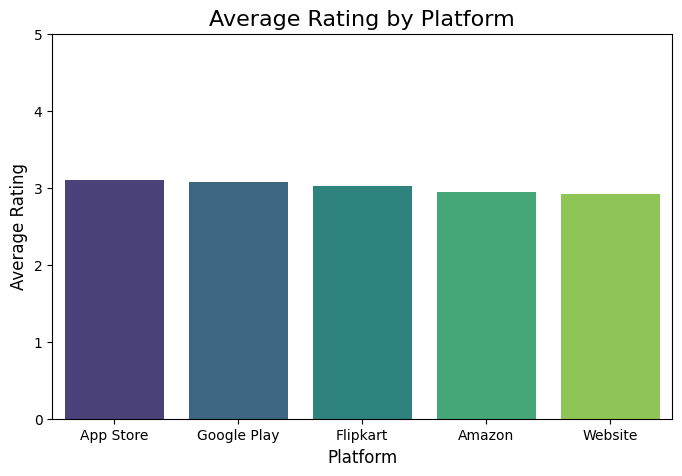

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x=platform_ratings.index,
    y=platform_ratings.values,
    palette="viridis"
)

plt.title("Average Rating by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0, 5)
plt.show()


# 7. Are verified users more satisfied than non-verified ones?


In [ ]:
df['verified_purchase'].value_counts()


,count
verified_purchase,
No,262
Yes,238


In [ ]:
verified_ratings = df.groupby('verified_purchase')['rating'].mean()
verified_ratings


,rating
verified_purchase,
No,3.019084
Yes,3.004202


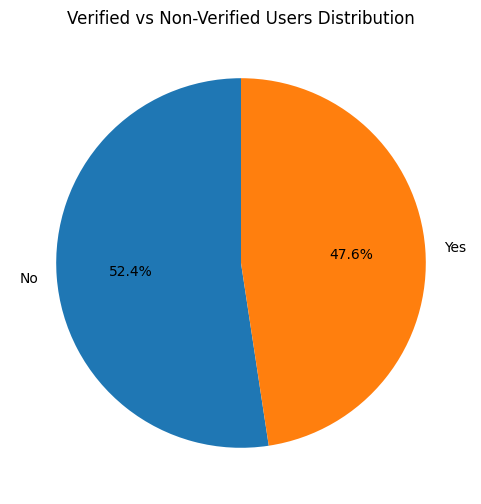

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    df['verified_purchase'].value_counts(),
    labels=df['verified_purchase'].value_counts().index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Verified vs Non-Verified Users Distribution")
plt.show()


# 8. What’s the average length of reviews per rating category?


In [ ]:
df['review_length'] = df['review'].apply(lambda x: len(str(x)))


In [ ]:
avg_length_by_rating = df.groupby('rating')['review_length'].mean()
avg_length_by_rating


,review_length
rating,
1,42.730337
2,43.905660
3,48.952381
4,49.745455
5,49.033333


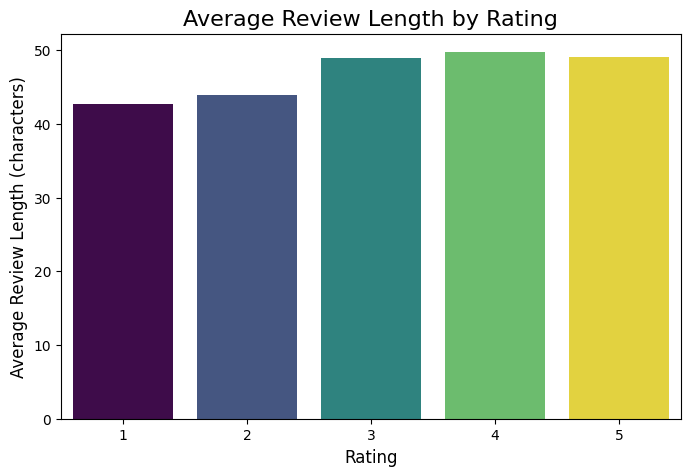

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=avg_length_by_rating.index,
    y=avg_length_by_rating.values,
    hue=avg_length_by_rating.index,
    palette="viridis",
    legend=False
)

plt.title("Average Review Length by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Review Length (characters)", fontsize=12)
plt.show()


# 9. What are the most mentioned words in 1-star reviews?


In [ ]:
one_star_reviews = df[df['rating'] == 1]['clean_review']


In [ ]:
one_star_text = " ".join(one_star_reviews)


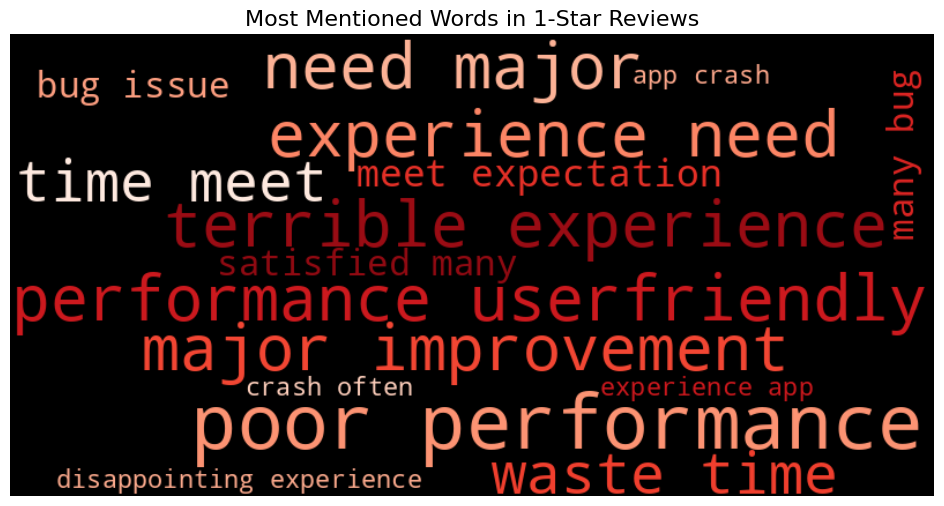

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_1star = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds'
).generate(one_star_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_1star, interpolation='bilinear')
plt.axis('off')
plt.title("Most Mentioned Words in 1-Star Reviews", fontsize=16)
plt.show()


# 10. What ChatGPT version received the highest average rating?


In [ ]:
df['version'].value_counts()


,count
version,
4.2.1,113
1.2.3,106
2.1.4,95
3.5.6,93
5.0.3,93


In [ ]:
version_avg = df.groupby('version')['rating'].mean().sort_values(ascending=False)
version_avg


,rating
version,
5.0.3,3.150538
3.5.6,3.043011
1.2.3,2.990566
2.1.4,2.968421
4.2.1,2.929204


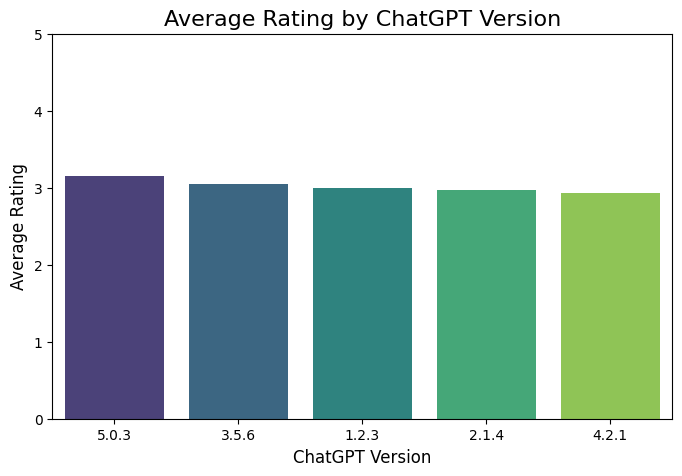

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=version_avg.index,
    y=version_avg.values,
    hue=version_avg.index,
    palette="viridis",
    legend=False
)

plt.title("Average Rating by ChatGPT Version", fontsize=16)
plt.xlabel("ChatGPT Version", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0,5)
plt.show()
